## Project: Data Wrangling using Pandas and Regex

In this project you are asked __to implement__ and __perform a unit testing__ for a series of Python functions (Q1-Q13) that are typically required during the ***data wrangling*** phase of the end-to-end data science pipeline. A subset of unit testing functions is provided for you. You are expected to write unit testing for all the remaining functions.

__Data Wrangling consists of the following main steps:__

* Data Acquisition
* Data Cleansing
* Data Understanding: Basics
* Data Manipulation
  
  
__1. Data Acquisition Objectives__

* Question 1: How to import multiples files for storage and access? (store filenames in array)
* Question 2: How to import data in different formats? (read_excel, read_csv)
* Question 2: How are they read into by pandas? (DataFrame)
* Question 4: How to have a peek at the data after import? (head/tail)

__2. Data Cleansing Objectives__

* Question 5: Check attributes of each file
* Question 5: Identify data types
* Question 5: Apply coercion if applicable
* Question 5: Check for NA/missing data
* Question 6: Remove/replace corrupt data
* Question 6: Identify duplicate data
* Question 6: Check for corrupt/incorrect data  

* Check for data consistency (e.g. GPA cannot be less than 0)
* Identifying and removing outliers

__3. Data Understanding Objectives__

* Question 7: Basic Summary Statistics
* Question 9: Dimensionality

__4. Data Manipulation Objectives__

* Question 11: Merge/Concatenate DataFrame
* Question 11: Mapping to create a new attribute
* Question 11: Incorporate the use of multiple functions
* Question 12: Filter to subset the data
* Question 13: Discretize data 
  
  
__Regular Expressions:__ *Regular expressions are used in conjunction with other preprocessing steps for matching/parsing patterns.*

* Questions 2/5/6: Filter to subset the dataUse regular expressions to find/match specific content
* Question 6: Filter to subset the dataString manipulation via. substring and replace methods

## Install Required Packages

If you do not have Anaconda installed, then you may need to install the following packages using the following commands (Note: If you have Anaconda installed, then you already have Pandas and `regex`):

> pip3 install pandas  
  
> pip3 install regex

## INSTRUCTIONS: In all the functions, remove the `pass` statement and write your code.

In [762]:
import pandas as pd
import re
import glob
import copy

%matplotlib inline
import matplotlib.pyplot as plt
from pprint import pprint

### __Question 1: Write a function to import all excel file names into a list.__

_Hint: Use the glob module._

In [763]:
def Q1_function():
    """
    :type : None
    :rtype: List[String]
    """
    # TYPE YOUR CODE HERE
    
    #generating a list of the filenames
    return [i.replace("./data_raw\\","") for i in glob.glob("./data_raw/*")]
    
# Call the function and print the result. This result is used in subsequent questions.
filenames = Q1_function()
pprint(filenames)

['Python-QUIZ Coercion (6 min.)-grades.xlsx',
 'Python-QUIZ Conditionals (6 min.)-grades.xlsx',
 'Python-QUIZ Dictionaries (10 min.)-grades.xlsx',
 'Python-QUIZ Exceptions (10 min.)-grades.xlsx',
 'Python-QUIZ Functions (18 min.)-grades.xlsx',
 'Python-QUIZ Iterations (6 min.)-grades.xlsx',
 'Python-QUIZ Lists (10 min.)-grades.xlsx',
 'Python-QUIZ Sets (7 min)-grades.xlsx',
 'Python-QUIZ Strings (5 min.)-grades.xlsx',
 'Python-QUIZ Taxonomy of Python Data Structures (12 min.)-grades.xlsx',
 'Python-QUIZ Tuples (10 min.)-grades.xlsx']


### __Question 2: Write a function to return an excel file based on a given string. *(The string is defined for you)*__  
*Hints: Use the following.*
* Regex 're.search' function.
* Pandas function 'read_excel'

In [764]:
def Q2_function(files, s):
    """
    :type : List[String], String
    :rtype: String
    """
    # TYPE YOUR CODE HERE
    for i in filenames:
        if(re.search(s,i)):
            return i 
    return 'File not found'
        
# Call the function and print the result. Use this to check the correctness of your code and for debugging.
file = Q2_function(filenames, s = "Dictionaries")
pprint(file)

'Python-QUIZ Dictionaries (10 min.)-grades.xlsx'


### __Question 3: Write a function to load the "Functions" excel file into a Pandas DataFrame.__  
*Hint: Remember you have executed functions in Questions 1 and 2. Try using them here. You can save some coding time!*  
* Use the result from Question 1.
* Use the function written in Question 2.
* Use the Pandas function 'read_excel' to import an excel file.

In [765]:
def Q3_function(files, s):
    """
    :type : List[String], String
    :rtype: Pandas DataFrame
    """
    # TYPE YOUR CODE HERE
    return pd.read_excel("./data_raw/"+Q2_function(filenames, s))
    
# Call the function and print the result. This result is used in subsequent questions.
functions_df = Q3_function(filenames, s = "Functions")
print(functions_df)
# functions_df.head(3)

       State                  Started on                   Completed  \
0   Finished    February 5 2018  3:19 PM    February 5 2018  3:34 PM   
1   Finished    February 4 2018  4:01 PM    February 4 2018  4:19 PM   
12  Finished    February 6 2018  3:57 PM    February 6 2018  4:12 PM   
2   Finished   February 10 2018  4:05 PM   February 10 2018  4:23 PM   
3   Finished    February 4 2018  4:59 PM    February 4 2018  5:16 PM   
4   Finished    February 5 2018  5:20 PM    February 5 2018  5:38 PM   
5   Finished   February 10 2018  9:49 PM  February 10 2018  10:07 PM   
6   Finished    February 5 2018  8:30 PM    February 5 2018  8:48 PM   
7   Finished   February 13 2018  4:17 AM   February 13 2018  4:35 AM   
8   Finished   February 12 2018  2:19 PM   February 12 2018  2:35 PM   
9   Finished  February 13 2018  10:45 AM  February 13 2018  11:03 AM   
10  Finished   February 11 2018  1:48 AM   February 11 2018  2:06 AM   
4   Finished    February 5 2018  5:20 PM    February 5 2018  5:3

### __Question 4: Using the output obtained in Question 3 as input for the current question, write a function to do the following.__  
* Find all the names of the columns and return as a list.
* Find the subset of the DataFrame (use `df.loc`) and return the new DataFrame. Include the following columns:   
_"id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"_
* Return the top 10 rows (use `df.head function`).

Learn about returning multiple values in Python.

In [766]:
def Q4_function(dataframe):
    """
    :type : DataFrame
    :rtype: [String], DataFrame, DataFrame
    """
    # TYPE YOUR CODE HERE
    
    #all rows but only the required columns
    df_subset = functions_df.loc[:,["id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"]]
    
    #returning:
    #names of columns in the data frame
    #all rows but only the required columns
    #top 10 rows of the subset created
    return [list(functions_df),df_subset,df_subset.head(10)]

# Call the function and print the results. These results are used in subsequent questions.
names, df_subset, top_10 = Q4_function(functions_df)

print("Column Names")
pprint(names)
print()
print("Subsetted Data")
pprint(df_subset)
print()
print("Top 10 Rows")
pprint(top_10)



Column Names
['State',
 'Started on',
 'Completed',
 'Time taken',
 'Grade/45.00',
 'Q. 1 /5.00',
 'Q. 2 /10.00',
 'Q. 3 /6.00',
 'Q. 4 /6.00',
 'Q. 5 /12.00',
 'Q. 6 /6.00',
 'id']

Subsetted Data
    id       Time taken  Grade/45.00  Q. 1 /5.00  Q. 2 /10.00  Q. 3 /6.00  \
0    0  14 mins 16 secs           32           5            6           6   
1    1  17 mins 54 secs           31           5            8           6   
12  12  15 mins 44 secs           20           3            4           3   
2    2          18 mins           30           5            6           6   
3    3  17 mins 31 secs           26           5            6           6   
4    4  17 mins 59 secs           25           5            6           6   
5    5          18 mins           24           5            6           6   
6    6          18 mins           23           5            6           0   
7    7    18 mins 1 sec           23           4            4           6   
8    8  16 mins 44 secs         

### Question 5: Using the subsetted DataFrame from the previous question, complete the following tasks.

* Identify the data type of every column. Return as a list. *(read about dtypes)*
* Strip all white spaces from the columns. 
    + try using list comprehension along with the 'sub' function in 're' module
* Check if 'Time taken' column has NA or empty values:
    + use `df.isnull().any()`. 
    + If YES, replace with 0: use `df.fillna()`.
* Using `regex` (`re.search`), convert the 'Time taken' column into seconds (int) and store in a new column called 'time' (e.g., convert __2 mins 10 secs__ into __130__. Note that to get 130, you need to do some math. Use coersion to convert str to int.
* Return the DataFrame with 'Time taken' column dropped.

In [767]:
def Q5_function(df):
    
    """
    :type : DataFrame
    :rtype: [String], DataFrame
    """
    # TYPE YOUR CODE HERE
    
    #data types of each column
    dtcols = list(df.dtypes) 
        
    #stripping all white spaces from column names
    df.columns = [re.sub("\s","",i) for i in df]
    
    #filling missing or NA values in the Time taken column with 0, using fillna()
    if(df['Timetaken'].isnull().any()):
        df.fillna(0)
    
    time = []
    for i in df['Timetaken']:
        d = i.split(' ')
        if(len(d)>2):
            time.append(int(d[0])*60+int(d[2]))
        elif(d[1]=='mins' or d[1]=='min'):
            time.append(int(d[0])*60)
        elif (d[1]=='secs' or d[1]=='sec'):
            time.append(int(d[0]))
    df['time'] = time
    df = df.drop(columns = 'Timetaken')
    return [dtcols,df]
    
# Call the function and print the results. These results are used in subsequent questions.

column_types, Q5_df = Q5_function(df_subset)
print("Column Datatypes")
pprint(column_types)
print()
print("New Update DataFrame")
pprint(Q5_df)


Column Datatypes
[dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O')]

New Update DataFrame
    id  Grade/45.00  Q.1/5.00  Q.2/10.00  Q.3/6.00 Q.4/6.00 Q.5/12.00  \
0    0           32         5          6         6     3.00     12.00   
1    1           31         5          8         6        -     12.00   
12  12           20         3          4         3        -     10.00   
2    2           30         5          6         6     3.00     10.00   
3    3           26         5          6         6     3.00      6.00   
4    4           25         5          6         6     6.00      2.00   
5    5           24         5          6         6     3.00      4.00   
6    6           23         5          6         0     0.00      6.00   
7    7           23         4          4         6     3.00      6.00   
8    8           22         4          4         6     0.00      8.00   
9    9           22  

### Question 6: Using the returned DataFrame from the previous question, complete the following tasks.

* Some columns might need to be converted to integer for the subsequent tasks. Identify which columns and convert them to int/float.
* Are there any duplicate rows? Remove them from the DataFrame.
* Data collected might be corrupt. Check whether data is missing or corrupt. Data is missing if there is a '-'. If missing data exists, replace with the mean of other values.
* With the above point in mind, find the mean values of all columns except 'id'. Append these as a row to your dataframe and return

*Hint: Note that the maximum marks for each column is different. Make sure you parse the information from the column name.*

In [768]:
import numpy as np
def Q6_function(df):
    
    """
    :type : DataFrame
    :rtype: DataFrame
    """
    # TYPE YOUR CODE HERE

    for i in df.columns:
        if(not np.issubdtype(df[i].dtype, np.number)):
            li = list(filter(lambda x: x != '-', df[i]))
            li = list(map(float,li))
            mean_val = round((np.mean(li)),2)
            df[i]=df[i].replace('-',mean_val)
            df[i] = pd.to_numeric(df[i])
    
    #dropping the duplicate columns
    df = df.drop_duplicates(keep='first')

    #appending the mean of each column
    mean_li = list(df.mean())
    mean_li.pop(0)
    mean_li.insert(0,df['id'].max()+1)
    
    df = pd.concat([df,pd.DataFrame([mean_li],columns=df.columns)],axis=0,ignore_index=True) 
    return df
    
# Call the function and print the results.
Q6_df = Q6_function(Q5_df)
print(Q6_df)

    id  Grade/45.00  Q.1/5.00  Q.2/10.00  Q.3/6.00  Q.4/6.00  Q.5/12.00  \
0    0    32.000000  5.000000   6.000000  6.000000  3.000000  12.000000   
1    1    31.000000  5.000000   8.000000  6.000000  2.050000  12.000000   
2   12    20.000000  3.000000   4.000000  3.000000  2.050000  10.000000   
3    2    30.000000  5.000000   6.000000  6.000000  3.000000  10.000000   
4    3    26.000000  5.000000   6.000000  6.000000  3.000000   6.000000   
5    4    25.000000  5.000000   6.000000  6.000000  6.000000   2.000000   
6    5    24.000000  5.000000   6.000000  6.000000  3.000000   4.000000   
7    6    23.000000  5.000000   6.000000  0.000000  0.000000   6.000000   
8    7    23.000000  4.000000   4.000000  6.000000  3.000000   6.000000   
9    8    22.000000  4.000000   4.000000  6.000000  0.000000   8.000000   
10   9    22.000000  5.000000   8.000000  6.000000  3.000000   5.810000   
11  10    21.000000  5.000000  10.000000  6.000000  2.050000   5.810000   
12  11    21.000000  4.00

### Question 7: Use previously created functions to load the 'Exceptions' dataset as a dataframe

* Calculate the mean of the total grade obtained by the students.
* Calculate the standard deviation of the total grade obtained by the students.
* Calculate Q1,Q2 and Q3 (quantiles) for the total grade.
* Find the maximum and minimum values for the total grade

* Return all values rounded to 2 decimal places

*Hint: Use the df.describe function*

In [769]:
def Q7_function(file):
    """
    :type : String
    :rtype: Float
    """
    # TYPE YOUR CODE HERE
    
    desc = round(Q3_function(filenames, file).describe()['Grade/21.00'],2)
    
    return (desc['mean'],desc['std'],desc['25%'],desc['50%'],desc['75%'],desc['max'],desc['min'])
    
# Call the function and print the results.
mean_,std_,q1,q2,q3,max_,min_ = Q7_function(file="Exceptions")
print("Mean:", mean_)
print("Std. Dev.:", std_)
print("First Quantile", q1)
print("Second Quantile", q2)
print("Third Quantile", q3)
print("Max:", max_)
print("Min:", min_)

Mean: 14.83
Std. Dev.: 2.19
First Quantile 13.46
Second Quantile 14.66
Third Quantile 16.62
Max: 18.5
Min: 10.83


### Question 8: Create a boxplot of the grade distribution in the 'Exceptions' dataset.

* Compare the plot lines to the values calculated in the previous question.
* Use df.plot.box function.

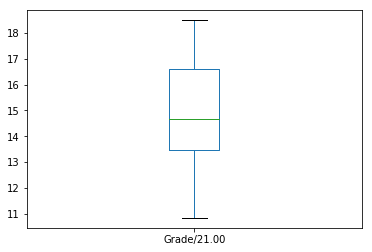

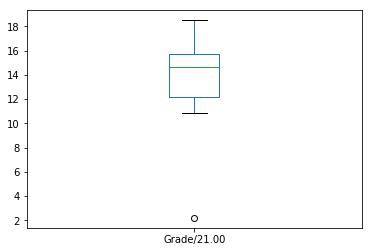

In [770]:
def Q8_function(file):
    
    """
    :type : String
    :rtype: Plot
    """
    #box plot of the values from obtained from Question 3
    df = Q3_function(filenames, file)
    Q8_plot = df[['Grade/21.00']].plot.box(return_type='axes')
    
    #box plot of the values from the previous question(Q7)
    li = list(Q7_function(file))
    df1 = pd.DataFrame(li, columns= ['Grade/21.00'])
    Q8_plot1 = df1[['Grade/21.00']].plot.box(return_type='axes')
    
    return Q8_plot


# Call the function. Plot will display.
Q8_function(file='Exceptions')

### Question 9: Return the number of rows and columns present in the 'Strings' dataset

* Use the `df.shape()` method.

In [771]:
def Q9_function(file):
    
    """
    :type : String
    :rtype: list
    """ 
    # TYPE YOUR CODE HERE
    
    return list(Q3_function(filenames, file).shape)

# Call the function and print the results
rows, columns = Q9_function (file='Strings')
print("Rows:",rows)
print("Columns:",columns)

Rows: 17
Columns: 7


### Question 10: Use the dataframe created in Question 6. Group the students based on their score in 'Q. 5 /12.00' column

* Which students scored 0 
* How many students achieved the maximum possible score
* Consider NA/missing values as 0

*Hint : Use groupby function.*


In [772]:
def Q10_function(df):
    
    """
    :type : DataFrame
    :rtype: list, int
    """ 
    # TYPE YOUR CODE HERE
    df = df.replace('-',int(0.0))
    df['Q.5/12.00'] = pd.to_numeric(df['Q.5/12.00'])
    df1 = df.groupby(['Q.5/12.00'])['Q.5/12.00'].count()
    count_max = df1[df1.index.max()]
    students = []
    df2 = df.groupby(['Q.5/12.00','id']).groups
    for marks,id in df2: 
        if marks == 0.00:
            students.append(id)
    return [students,count_max]

# Call the function and print the results
columns, q5_df = Q5_function(df_subset)
zero, maximum = Q10_function(q5_df)
print("Students scoring zero :",zero)
print("Number of students with maximum score :",maximum)

Students scoring zero : [9, 10, 13, 17, 18]
Number of students with maximum score : 2


### Question 11: Find out who ('id') has scored the maximum combined score in the 'Tuples' and 'Taxonomy' quiz.

* Use the `pd.merge()` function.
* Call the function you wrote for Question 5 to convert time and remove spaces in columns (will be used in later questions).
* Create a new column 'Total_score' which is the sum of the scores of the two quizzes.

In [773]:
def Q11_function():
    
    """
    :type : None
    :rtype: Dataframe, int
    """ 
    # TYPE YOUR CODE HERE
    
    col_list1,df_tuples = Q5_function(Q3_function(filenames, s = "Tuples"))
    col_list2, df_taxonomy = Q5_function(Q3_function(filenames, s = "Taxonomy"))
    
    Q11_df = pd.merge(df_tuples,df_taxonomy,on='id')
    Q11_df['Total_score']=Q11_df['Grade/20.00']+Q11_df['Grade/21.00']
   
    max_score = Q11_df['Total_score'].max()
    max_scorer = 0

    for id,score in Q11_df.groupby(['id','Total_score']).groups:
        if(score == max_score):
            max_scorer = id
    return [Q11_df,max_scorer]
    
            

# Call the function and print the results. The DataFrame will be used in subsequent questions
Q11_df,max_scorer = Q11_function()
# print(Q11_df)
print("Max scorer :",max_scorer)

Max scorer : 10


### Question 12: Use the DataFrame generated in Question 11 and return the list of ids whose total time for both quizzes is less than than 20 minutes.

* Sort the list before returning.
* Can you code it in one line?

In [775]:
def Q12_function(df):
    
    """
    :type : DataFrame
    :rtype: list(int)
    """ 
    # TYPE YOUR CODE HERE
            
    return sorted([row['id'] for index, row in Q11_df[['id','time_x','time_y']].iterrows() if((row['time_x']+row['time_y'])/60 < 20)])

# Call the function and print the results.
ids = Q12_function(Q11_df)
print("ID of students :",ids)

ID of students : [3, 4, 7, 8, 12, 18]


### Question 13: Discretize the column 'Grade/45.00' for the DataFrame generated in Question 6 and create a new column. Find the number of people (id) per bin. Return a DataFrame with only the bins and count per bin.

*Hints:* 
* _Use 'cut' and 'groupby'._
* _Include the overall average in the groupings._
* _You won't need to use 'drop' to drop columns. Use groupby and check the result._
* _Use 5 bins_
* Don't consider 'Overall Average' row.

In [776]:
def Q13_function(df):
    
    """
    :type : DataFrame
    :rtype: DataFrame
    """    
    # TYPE YOUR CODE HERE
    df['df_bins'] = pd.cut(df['Grade/45.00'],5)
    itr = df.groupby('df_bins').groups.keys()
    li = []
    for i in itr:
        get_id = list(df.groupby('df_bins').get_group(i)['id'])
        if(len(df['id'])-1 in get_id):
            get_id.remove(len(df['id'])-1)
        li.append(get_id)
    global Q6_df 
    Q6_df = df.drop(columns = 'df_bins')
    return pd.Series(li)

# Call the function and print the results.
Q13_df = Q13_function(Q6_df)
pprint(Q13_df)

0           [15, 16, 17, 18]
1               [12, 13, 14]
2    [5, 6, 7, 8, 9, 10, 11]
3                     [3, 4]
4                  [0, 1, 2]
dtype: object


### INSTRUCTIONS: Complete unit testing for the remaining functions to check correctness of your code.

In [777]:
import unittest
from pandas.testing import assert_frame_equal

class TestNotebook(unittest.TestCase):


    def test_Q01_function(self):
        
        ans = ['Python-QUIZ Coercion (6 min.)-grades.xlsx', 'Python-QUIZ Conditionals (6 min.)-grades.xlsx', 'Python-QUIZ Dictionaries (10 min.)-grades.xlsx', 'Python-QUIZ Exceptions (10 min.)-grades.xlsx', 'Python-QUIZ Functions (18 min.)-grades.xlsx', 'Python-QUIZ Iterations (6 min.)-grades.xlsx', 'Python-QUIZ Lists (10 min.)-grades.xlsx', 'Python-QUIZ Sets (7 min)-grades.xlsx', 'Python-QUIZ Strings (5 min.)-grades.xlsx', 'Python-QUIZ Taxonomy of Python Data Structures (12 min.)-grades.xlsx', 'Python-QUIZ Tuples (10 min.)-grades.xlsx']
        result = Q1_function()
        # checking all the file names in the location
        self.assertEqual(ans,result)
        
    def test_Q02_function(self):
        
        ans='Python-QUIZ Lists (10 min.)-grades.xlsx'        
        result=Q2_function(filenames, s = "Lists")
        #Handling removal of the path to check only filename
        self.assertEqual(ans,result.split("/")[-1].split("\\")[-1])

    def test_Q03_function(self):
        #checking the result for the other file with 'Strings' as the search term
        ans = pd.read_excel("./data_raw/Python-QUIZ Strings (5 min.)-grades.xlsx")
        result=Q3_function(filenames, s = "Strings")
        #Checking if the left and right data frames are equal    
        assert_frame_equal(ans, result)
        
    def test_Q04_function(self):
        
        cols_ans=['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00', 'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00', 'Q. 6 /6.00',  'id']
        subset_cols_ans= ["id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"]
        top_ans=10
        
        cols_result,subset_result,top_result=Q4_function(functions_df)

        self.assertEqual(cols_ans,list(cols_result))
        self.assertEqual(subset_cols_ans,list(subset_result.columns))
        self.assertEqual(top_ans,len(top_result))
        
        
    def test_Q05_function(self):
        col_dtypes_result, result = Q5_function(df_subset) 
        
        #checking if the column names have sppaces in them 
        for i in result.columns:
            self.assertEqual(re.search("\s",i),None)
        
        #checking if the 'Time taken' column is dropped
        self.assertEqual('Time' in result.columns,False)
        
        #check if the time column exists and if its data type is numeric
        self.assertEqual('time' in result.columns,True)
        self.assertEqual(np.issubdtype(result['time'].dtype, np.number),True)
        
        #checking the received column data types
        column_datatypes = [np.dtype('int64'), np.dtype('O'), np.dtype('int64'), np.dtype('int64'), np.dtype('int64'), np.dtype('int64'), np.dtype('O'), np.dtype('O'), np.dtype('O'), np.dtype('int64')]
        self.assertEqual(col_dtypes_result,column_datatypes)
        
    def test_Q06_function(self):
        result = Q6_function(Q5_df)
        
        #checking if there are no duplicate rows
        for i in result.duplicated():
                self.assertEqual(i,False)       
        
        #check if there are missing values with '-' in the output
        for i in result.columns:
            self.assertEqual(re.search("-",i),None)        
        
        #check the last row with mean values
        means_row = [19.0, 21.63157894736842, 4.315789473684211, 5.368421052631579, 4.894736842105263, 2.0105263157894737, 5.759473684210526, 1.0442105263157897, 1125.3684210526317]
        means_row_result = list(result.iloc[len(result)-1])
        self.assertEqual(means_row_result,means_row)
        
    def test_Q07_function(self):
        
        ans=(14.83,2.19,13.46,14.66,16.62,18.5,10.83) 
        result=Q7_function(file="Exceptions")
        self.assertEqual(ans, result)

    def test_Q09_function(self):
        #chekcing the list [rows,columns]
        ans = [17,7]
        result = Q9_function (file='Strings')
        self.assertEqual(ans, result)

    def test_Q10_function(self):
        #chekcing the list [rows,columns]
        ans = [[9, 10, 13, 17, 18],2]
        columns, q5_df = Q5_function(df_subset)
        result = Q10_function(q5_df)
        self.assertEqual(ans, result)

    
    def test_Q11_function(self):
        #expected values of total scores
        Total_score_column = [32, 39, 37, 37, 41, 39, 38, 39, 37, 33, 27, 32, 31, 24]   
        
        #expected ids who scored maximum
        max_score = 10
        
        df,max_score_result = Q11_function()
        self.assertEqual(list(df['Total_score']), Total_score_column)
        self.assertEqual(max_score, max_score_result)

    def test_Q12_function(self):
        ans=[3, 4, 7, 8, 12, 18]   
        result=Q12_function(Q11_df)
        self.assertEqual(ans, result)

    def test_Q13_function(self):
        ans = [[15, 16, 17, 18], [12, 13, 14], [5, 6, 7, 8, 9, 10, 11], [3, 4], [0, 1, 2]]
        temp = Q13_function(Q6_df)
        result = [temp.iloc[x] for x in range(len(temp))]
        
        for x in range(len(ans)):
            self.assertEqual(sum(result[x]), sum(ans[x]))
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_Q01_function (__main__.TestNotebook) ... ok
test_Q02_function (__main__.TestNotebook) ... ok
test_Q03_function (__main__.TestNotebook) ... ok
test_Q04_function (__main__.TestNotebook) ... ok
test_Q05_function (__main__.TestNotebook) ... ok
test_Q06_function (__main__.TestNotebook) ... ok
test_Q07_function (__main__.TestNotebook) ... ok
test_Q09_function (__main__.TestNotebook) ... ok
test_Q10_function (__main__.TestNotebook) ... ok
test_Q11_function (__main__.TestNotebook) ... ok
test_Q12_function (__main__.TestNotebook) ... ok
test_Q13_function (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 12 tests in 0.294s

OK
